# **Califirnia Housing Price**

In [ ]:
# Building a Regression MLP Using the Sequential API
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [ ]:
# The House Prices Dataset
housing = fetch_california_housing()
print("Examples = ",housing.data.shape ," Labels = ", housing.target.shape)


Examples =  (20640, 8)  Labels =  (20640,)


In [ ]:
X = housing.data
Y = housing.target

print("Example 0 : ",housing.data[0])
print("\nLabel 0 : ",housing.target[0])


Example 0 :  [   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]

Label 0 :  4.526


In [ ]:
Y[0]

4.526

In [ ]:
# Dataset to DataFrame
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df["price"] = pd.Series(housing.target)
print("Info : \n",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
Info : 
 None


In [ ]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
# Dropping the duplicate rows
duplicate_rows = df[df.duplicated()]
print("number of duplicate rows : ",duplicate_rows.shape)

# df.drop_duplicates(inplace=True)

number of duplicate rows :  (0, 9)


SUM : 
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64


<Axes: >

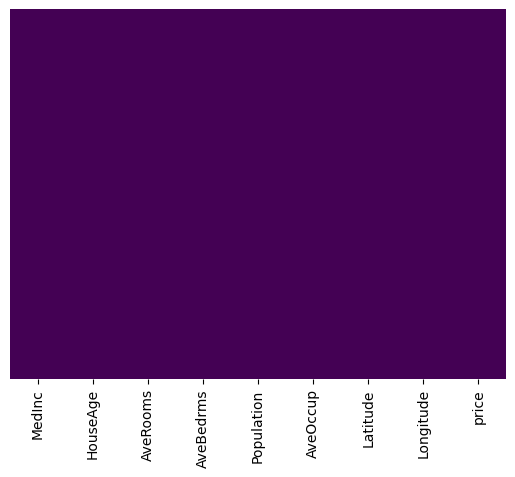

In [ ]:
# To check missing values
print("SUM : \n",df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")


In [ ]:
X_data = df.drop(["price"], axis=1).values
y_data = df["price"].values
print("X_data : ",X_data.shape," y_data : ",y_data.shape)

X_data :  (20640, 8)  y_data :  (20640,)


In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_data)
X_sts = scaler.transform(X_data)

In [ ]:
# Split into Input and Output Elements
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X_sts,
              y_data, test_size= 0.20, random_state=100)
# Val set
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full
                                                      , test_size= 0.10)

print("X_train  = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test   = ",X_test.shape ," y_test = ", y_test.shape)
print("X_valid  = ",X_valid.shape ," y_valid = ", y_valid.shape)


X_train  =  (14860, 8)  y_train =  (14860,)
X_test   =  (4128, 8)  y_test =  (4128,)
X_valid  =  (1652, 8)  y_valid =  (1652,)


In [ ]:
type(X_train.shape[1:]),X_train.shape[1:]

(tuple, (8,))

In [ ]:
# Creating the model using the Sequential API
model = keras.models.Sequential()
model.add(keras.layers.Dense(100, activation="relu", input_shape = X_train.shape[1:]))  # input_dim = 8
model.add(keras.layers.Dense(25, activation="relu"))
model.add(keras.layers.Dense(25, activation="relu"))
model.add(keras.layers.Dense(25, activation="relu"))
model.add(keras.layers.Dense(25, activation="relu"))
model.add(keras.layers.Dense(8, activation="relu"))
model.add(keras.layers.Dense(1, activation="relu")) # price > 0, so, relu

# The model’s summary() method displays all the model’s layers
#print(model.summary())


C:\Users\Nvidia\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compiling the model
# https://keras.io/models/sequential/
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=["mae"])

# Training and evaluating the model
history = model.fit(X_train, y_train, epochs=100, batch_size=128, validation_data=(X_valid, y_valid))
# history = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_split=0.2)


Epoch 1/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.9330 - mae: 1.0310 - val_loss: 0.5993 - val_mae: 0.5810
Epoch 2/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5679 - mae: 0.5600 - val_loss: 0.4921 - val_mae: 0.5014
Epoch 3/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4705 - mae: 0.4965 - val_loss: 0.6145 - val_mae: 0.6454
Epoch 4/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4357 - mae: 0.4805 - val_loss: 0.5668 - val_mae: 0.5192
Epoch 5/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4080 - mae: 0.4563 - val_loss: 0.5600 - val_mae: 0.5945
Epoch 6/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3872 - mae: 0.4489 - val_loss: 0.4489 - val_mae: 0.5132
Epoch 7/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3710 - mae: 0.4380 - val_loss: 0.3772 - val_mae: 0.4615
Epoch 8/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3810 - mae: 0.4382 - val_loss: 0.3712 - val_mae: 0.4434
Epoch 9/100
117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

In [ ]:
history.history

{'loss': [1.1064547300338745,
  0.5445446968078613,
  0.4645947515964508,
  0.4268124997615814,
  0.4032433032989502,
  0.38779985904693604,
  0.3713389039039612,
  0.3695926368236542,
  0.35966330766677856,
  0.35547035932540894,
  0.35039862990379333,
  0.3467334806919098,
  0.3518392741680145,
  0.3398279547691345,
  0.33315515518188477,
  0.33410924673080444,
  0.32723963260650635,
  0.327926367521286,
  0.328886479139328,
  0.32381901144981384,
  0.32086995244026184,
  0.31928297877311707,
  0.32331472635269165,
  0.314663827419281,
  0.30740222334861755,
  0.31805410981178284,
  0.3098561465740204,
  0.3147270679473877,
  0.3064548075199127,
  0.3140241503715515,
  0.30375415086746216,
  0.3096705675125122,
  0.2992437779903412,
  0.3032066524028778,
  0.3076815903186798,
  0.3010405898094177,
  0.29186373949050903,
  0.30219876766204834,
  0.29558607935905457,
  0.29780781269073486,
  0.30098554491996765,
  0.29266947507858276,
  0.291412353515625,
  0.28986862301826477,
  0.293

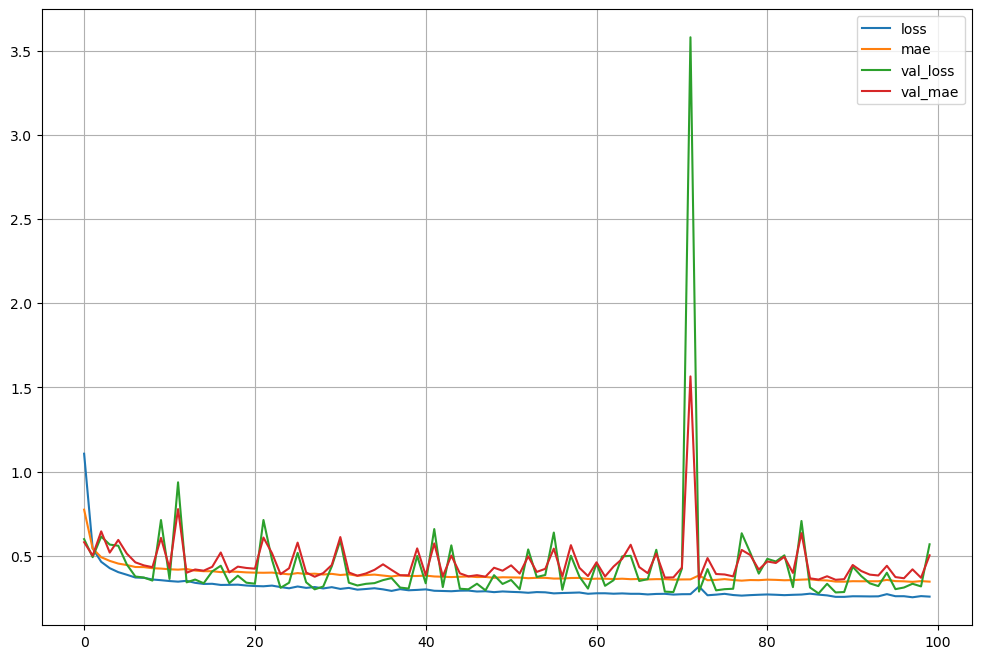

-----------------------------------------------------------------------
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - loss: 0.5497 - mae: 0.4909
Loss                   :  0.5573840141296387
Mean Absolute Error     :  0.494515061378479


In [ ]:
# plot the learning curves
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(12, 8))
plt.grid(True)
#plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

print("-----------------------------------------------------------------------")
# Evaluate the model
model_evaluate = model.evaluate(X_test, y_test)
print("Loss                   : ",model_evaluate[0])
print("Mean Absolute Error     : ",model_evaluate[1])


In [ ]:
# Comparison of the actual results with the predicted results
predicted = model.predict(X_test)

# Model evaluation
print("Mean Absolute Error    : ", metrics.mean_absolute_error(y_test, predicted))
print("Mean Squared Error     : ", metrics.mean_squared_error(y_test, predicted))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print("r2_score               : ", metrics.r2_score(y_test, predicted))

print("-----------------------------------------------------------------------")
df_data = pd.DataFrame({"Actual": y_test.flatten(), "Predicted": predicted.flatten()})
print(df_data.head(15))
print("-----------------------------------------------------------------------")

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step
Mean Absolute Error    :  0.4945150471748585
Mean Squared Error     :  0.5573840698032267
Root Mean Squared Error:  0.7465815895153234
r2_score               :  0.5863253637697883
-----------------------------------------------------------------------
    Actual  Predicted
0    2.453   2.291268
1    1.042   0.786781
2    1.462   1.371894
3    1.542   0.880362
4    3.242   1.337260
5    1.411   1.187163
6    2.273   1.744284
7    2.023   2.324672
8    1.702   0.833275
9    3.018   2.455917
10   1.522   1.245060
11   3.081   3.127561
12   4.850   4.331577
13   1.625   2.274115
14   2.250   2.382254
-----------------------------------------------------------------------
